## Fazer  [TP3]
- Da página 30 até 35 porém invés de distribuição de Poisson usar distribuição de __Gauss__
- 'Como criar binomial' -> Só que Gauss (normal): Cumulativa, gráficos, moda, mediana, desvio padrão

# Versão 1: Arquivo Original

### 5.4.2 Como criar uma distribuição de Poisson
Vamos começar, mais uma vez, por visualizar a forma da distribuição de Poisson. Para isso
iremos recorrer mais uma vez ao jupyter notebook, e utilizando o pacote scipy do python:

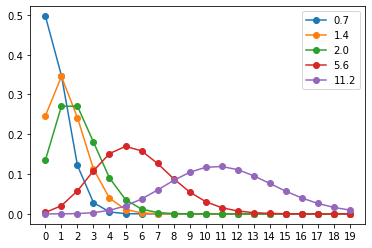

In [2]:
# Listing 9: Como desenhar a função de Poisson utilizando o pacote scipy.
%matplotlib inline
import os
import numpy as np
import math
from scipy.stats import poisson # pacote que possui a distribuicao de Poisson
import matplotlib.pyplot as plt
l = np.array([0.7 ,1.4 ,2 ,5.6 ,11.2])
def f (x , l):
    return poisson.pmf(x, l)
x = np.arange(0, 20)
for lval in l:
    plt.plot(x, f(x, lval), '-o', label = lval)
    plt.legend()
    plt.xticks(np.arange(min(x), max(x) +1, 1.0))

Repare-se que se utilizaram os valores de λ de 0,7; 1,4; 2,0; 5,6; e 11,2 para ilustrar que este
valor não tem que ser inteiro. <p>
Agora utilizando o nosso próprio código de raiz:

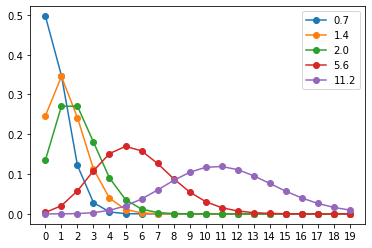

In [3]:
# Listing 10: Como desenhar a função de Poisson utilizando um código de raiz.
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt
def factorial(x) :
    factorial =1
    for i in range(1 , x +1) :
        factorial = factorial * i
    return factorial
def poisson(x , l ) :
    poisson = l ** x / factorial ( x ) * math . exp ( - l )
    return poisson
def poiss(x , l ) :
    poiss =[]
    for i in x :
        poiss.append( poisson (i , l ) )
    return poiss
x = np.arange(0 ,20)
l = np.array([0.7 ,1.4 ,2 ,5.6 ,11.2])
for lval in l :
    plt.plot(x , poiss(x , lval ) , '-o' , label = lval )
    plt.legend()
    plt.xticks( np.arange( min( x ) , max( x ) +1 , 1.0) )

Como se pode ver, mais uma vez, os gráficos são idênticos. <p>
Podemos também escrever um código para a distribuição cumulativa de probabilidades, tanto
usando o scipy como um código de raiz.

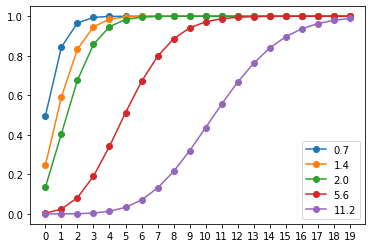

In [5]:
# Listing 11: Cumulativa da função de Poisson utilizando o scipy.
%matplotlib inline
import os
import numpy as np
import math
from scipy.stats import poisson # pacote que possui a funcao poisson
import pandas as pd
import matplotlib.pyplot as plt
l = np.array ([0.7 ,1.4 ,2 ,5.6 ,11.2])
def f(x , l ) :
    return poisson.cdf(x , l )
x = np.arange (0 ,20)
for lval in l :
    plt.plot(x, f(x , lval ) , '-o' , label = lval )
    plt.legend ()
    plt.xticks(np.arange( min( x ) , max( x ) +1 , 1.0) )

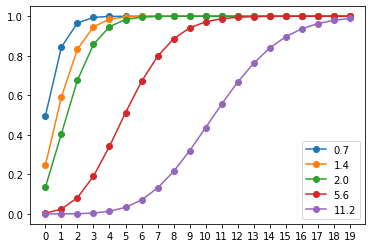

In [6]:
# Listing 12: Cumulativa da função de Poisson utilizando um código de raiz.
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import poisson
def factorial( x ) :
    factorial =1
    for i in range(1 , x +1) :
        factorial = factorial * i
    return factorial
def cumulative(x , l ) :
    cum = 0.0
    for j in range(0 , x +1) :
        cum += l ** j / factorial( j ) * math.exp( - l )
    return cum
def cumul(x , l ) :
    cumul =[]
    for i in x :
        cumul.append(cumulative(i , l ) )
    return cumul
x = np.arange(0 ,20)
l = np.array([0.7 ,1.4 ,2 ,5.6 ,11.2])
for lval in l :
    plt.plot (x , cumul(x , lval ) , '-o' , label = lval )
    plt.legend()
    plt.xticks(np.arange(min( x ) , max( x ) +1 , 1.0) )

Como se pode ver, os gráficos são semelhantes como não podia deixar de ser.

### 5.4.3 Propriedades da distribuição de Poisson. [tão errados]
A distribuição de Poisson tem uma média, uma moda, um desvio padrão e outras propriedades
que podem ser encontradas na tabela seguinte.
<p>Distribuição (probability mass function)     $p(k, \lambda) = \frac{\lambda^k e^{−\lambda}}{k!}$

Cumulativa (cumulative distribution function)   $cdf(k, \lambda) = \sum\limits _{i=0} ^{k} \frac{\lambda^i e^{−\lambda}}{i!}$

Média     $\lambda$

Mediana 
    $≈ [λ + 1/3 − 0.02/λ]$

Moda 
- se λ é não inteiro a moda é $[λ]$
- se λ é inteiro as modas são $λ$ e $λ − 1$

Variância $λ$

Desvio-padrão $\sqrt\lambda$
<p>Em baixo um exemplo de um código para determinar médias, modas e medianas da distribuição
de Poisson:

In [7]:
# Listing 13: Cálculo da média moda e mediana das distribuições de Poisson definidas acima.
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

def factorial( x ) :
    factorial =1
    for i in range(1 , x +1) :
        factorial = factorial * i
    return factorial
def poisson(x , l ) :
    poisson = l ** x / factorial( x ) * math.exp( - l )
    return poisson
def poiss(x , l ) :
    poiss =[]
    for i in x :
        poiss.append( poisson(i , l ) )
    return poiss
l = np.array ([0.7 ,1.4 ,2 ,5.6 ,11.2])
S = len( l )
mode =[]
median =[]
mean =[]
variance =[]
stdev =[]
for lval in l :
    mean1 = lval
    mean.append ( mean1 )
    variance1 = lval
    variance.append( lval )
    stdev1 = round ( math.sqrt( lval ) ,2)
    stdev.append( stdev1 )
    median1 = math.floor( lval +1/3 -0.02/ lval )
    if lval != int( lval ) :
        mode1 = math.floor( lval )
        mode.append(mode1 )
    else :
        mode1 = lval
        mode2 = lval -1
        mode.append( ' modas :% s ,% s ' %( mode2 , mode1 ) )
    median.append( median1 )

dados = { ' lambda ': l , ' media ': mean , ' mediana ': median , ' moda ': mode , "variancia " : variance , " desvio padrao " : stdev }
df = pd.DataFrame( data = dados ).set_index( ' lambda ')
df

,media,mediana,moda,variancia,desvio padrao
lambda,,,,,
0.7,0.7,1,0,0.7,0.84
1.4,1.4,1,1,1.4,1.18
2.0,2.0,2,"modas :1.0 ,2.0",2.0,1.41
5.6,5.6,5,5,5.6,2.37
11.2,11.2,11,11,11.2,3.35
